In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-dataset/Customers.csv


In [50]:
df = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


## Exploratory Analysis

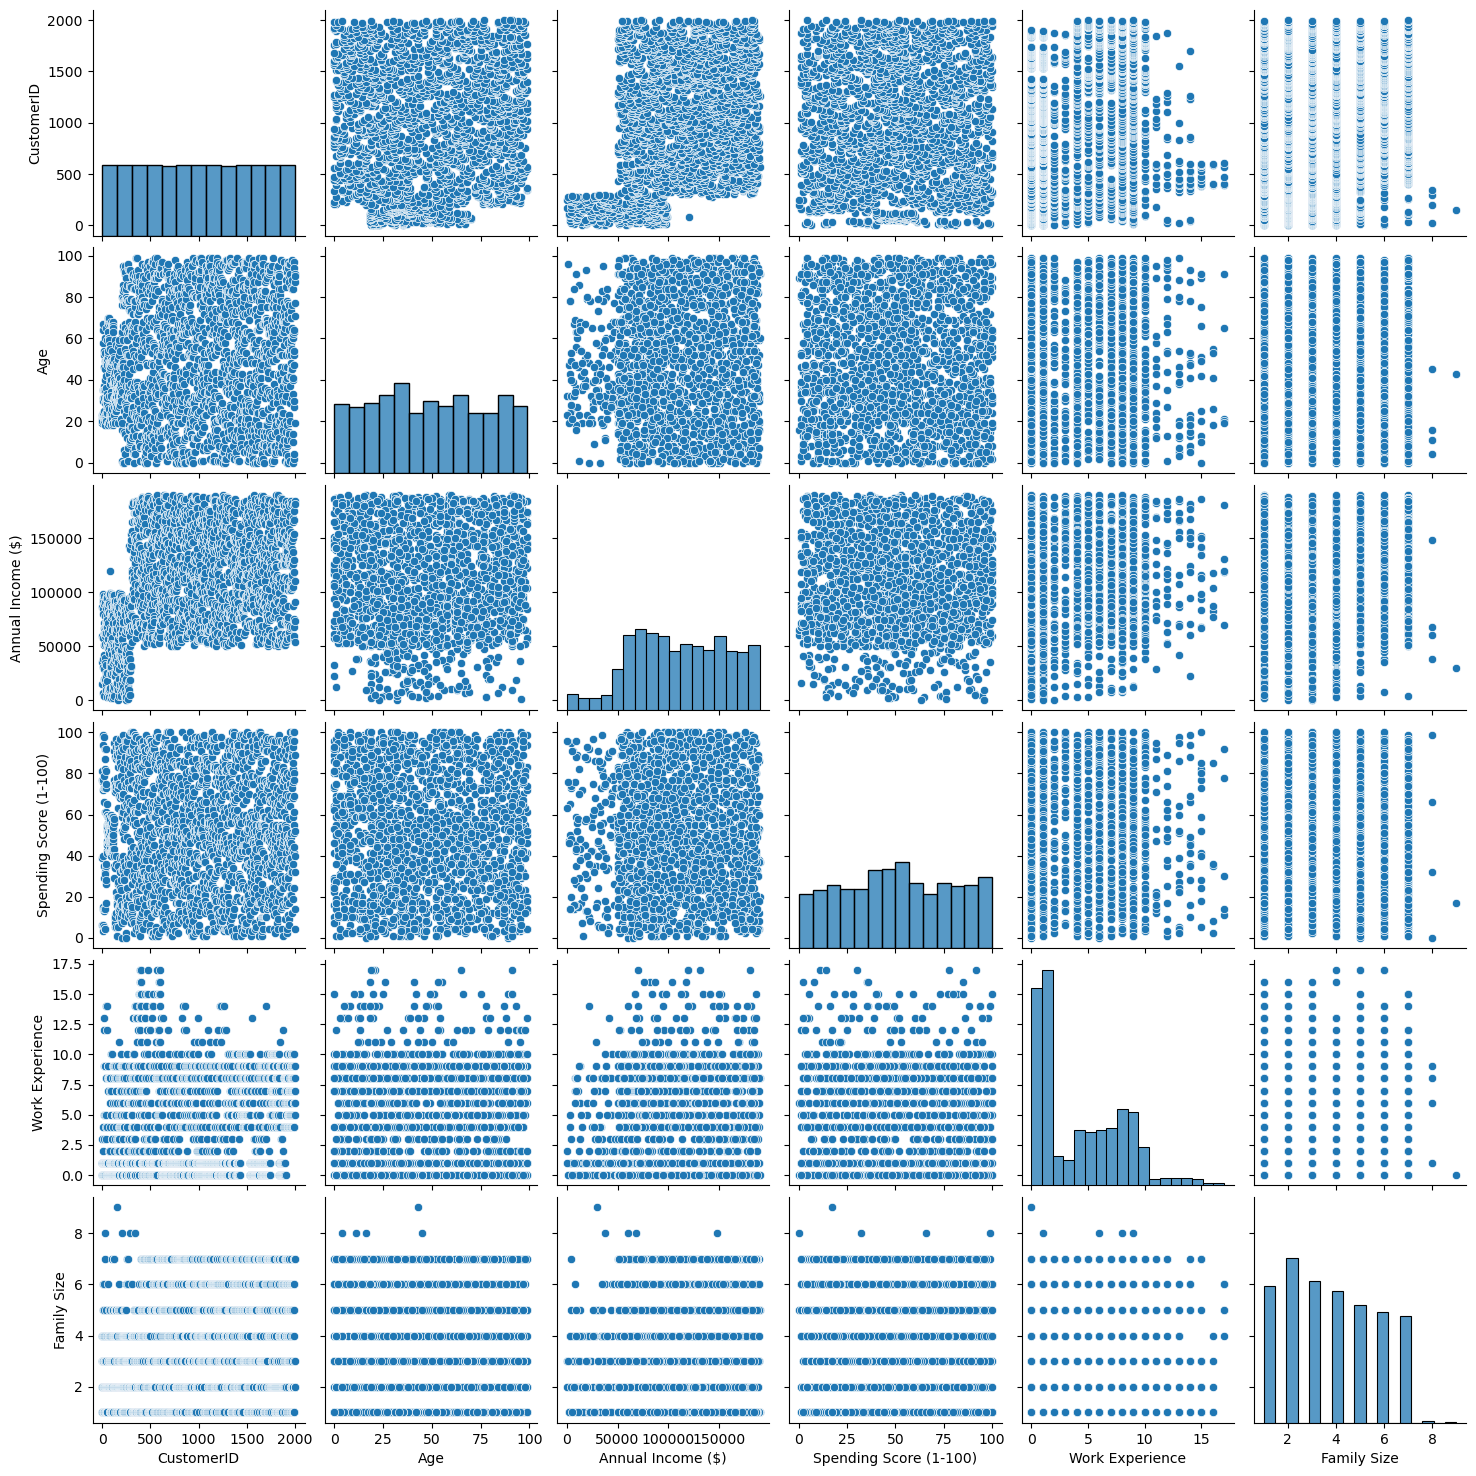

In [51]:
sns.pairplot(df)

<AxesSubplot:ylabel='Profession'>

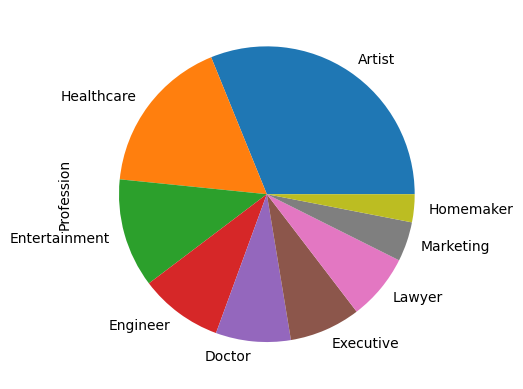

In [52]:
df.Profession.value_counts().plot.pie()

## Encoding for Machine Learning

In [53]:
y = df['Spending Score (1-100)']
X = pd.get_dummies(df, columns=['Gender', 'Profession'])
X.drop(columns='Spending Score (1-100)', inplace=True)
X

,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,1,4,0,1,0,0,0,0,0,1,0,0,0
1,2,21,35000,3,3,0,1,0,0,1,0,0,0,0,0,0
2,3,20,86000,1,1,1,0,0,0,1,0,0,0,0,0,0
3,4,23,59000,0,2,1,0,0,0,0,0,0,0,0,1,0
4,5,31,38000,2,6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,8,7,1,0,1,0,0,0,0,0,0,0,0
1996,1997,91,73158,7,7,1,0,0,1,0,0,0,0,0,0,0
1997,1998,87,90961,9,2,0,1,0,0,0,0,0,1,0,0,0
1998,1999,77,182109,7,2,0,1,0,0,0,0,1,0,0,0,0


### Import ML modules and assessors

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=523)
#Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred_lr))

#Decision Tree Model
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred_dt))

23.16089190080087
23.15921823154874
